# Lab 2: Temperature and Pressure

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
T0 = 23 + 273 # Initial temperature in kelvin
TF = 20 + 273 # Final temperature in kelvin

In [5]:
def get_data(filePath):
    data = np.loadtxt(filePath, delimiter=",", skiprows=1)
    pp = data[:, 1]
    return pp

# Exctract raw Phyphox data
allenRaw = get_data("Data/allen-data.csv")
joelRaw = get_data("Data/joel-data.csv")
justinRaw = get_data("Data/justin-data.csv")
timRaw = get_data("Data/tim-data.csv")


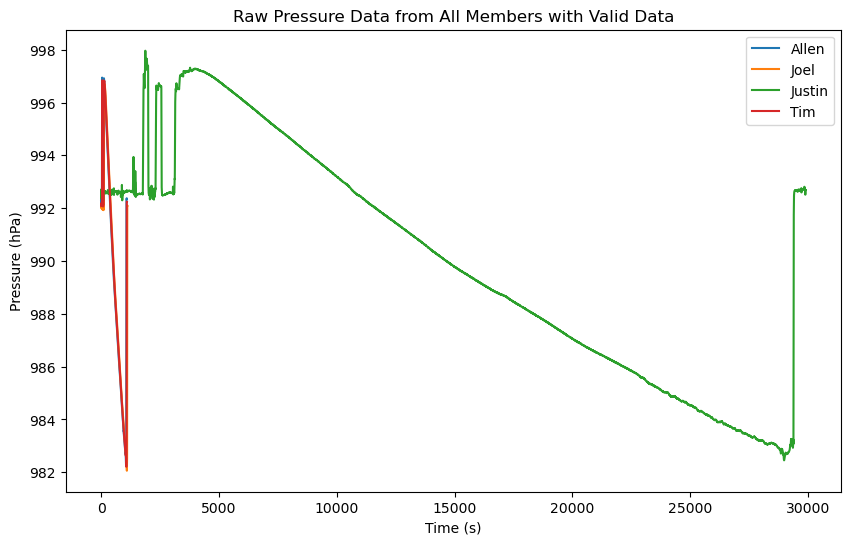

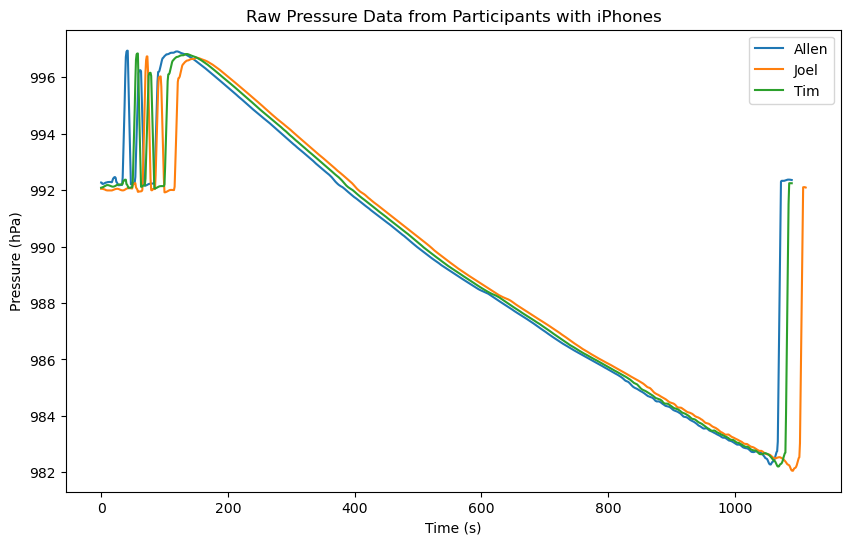

In [6]:
# Graph raw data to check for sample rates and size 
plt.figure(figsize=(10, 6))
plt.plot(allenRaw, label="Allen")
plt.plot(joelRaw, label="Joel")
plt.plot(justinRaw, label="Justin")
plt.plot(timRaw, label="Tim")
plt.xlabel("Time (s)")
plt.ylabel("Pressure (hPa)")
plt.legend()
plt.title("Raw Pressure Data from All Members with Valid Data")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(allenRaw, label="Allen")
plt.plot(joelRaw, label="Joel")
plt.plot(timRaw, label="Tim")
plt.xlabel("Time (s)")
plt.ylabel("Pressure (hPa)")
plt.legend()
plt.title("Raw Pressure Data from Participants with iPhones")
plt.show()

Allen's data starts at index: 119
Joel's data starts at index: 150
Tim's data starts at index: 134


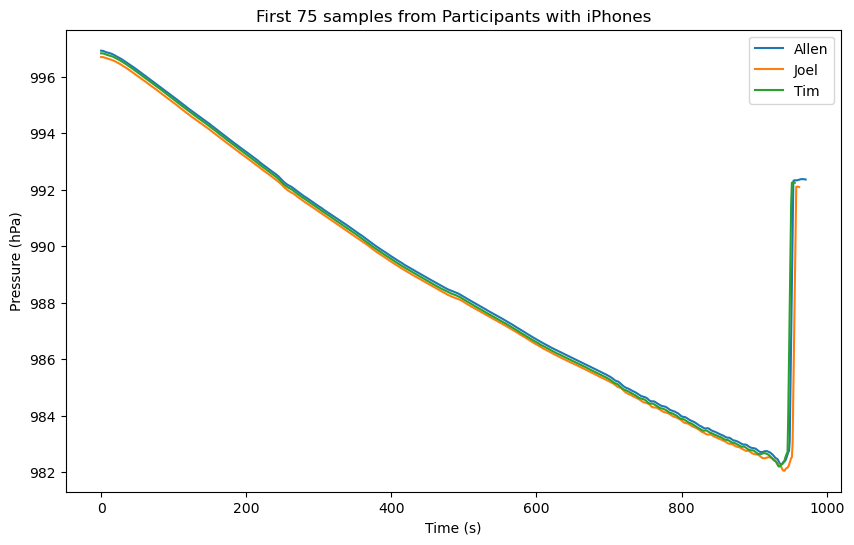

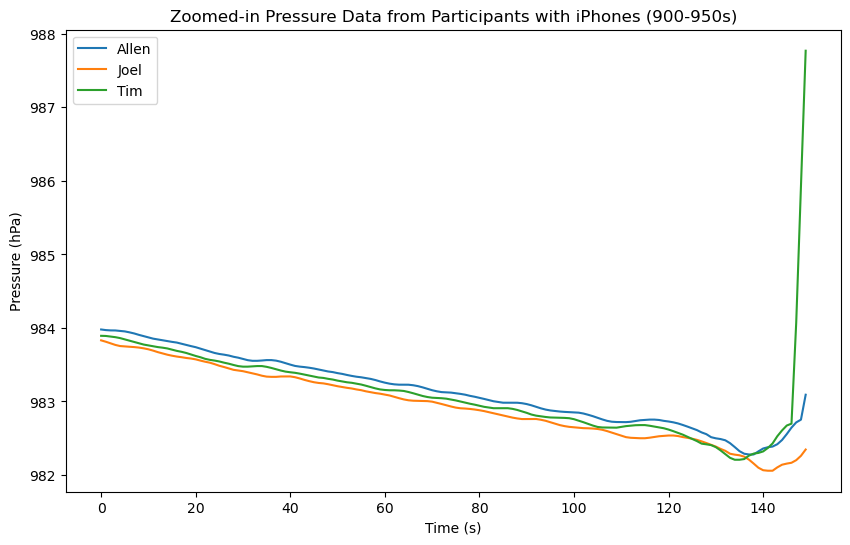

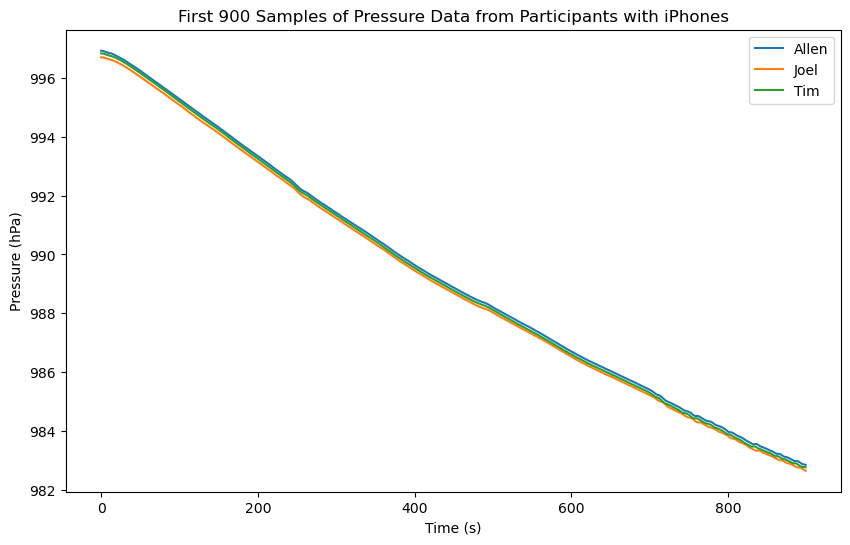

Allen's data length: 900
Joel's data length: 900
Tim's data length: 900
Allen's minimum pressure: 982.8546906
Joel's minimum pressure: 982.6541138
Tim's minimum pressure: 982.771759


In [7]:
# Cleaning up Data

sampleStartIndex = 75 # Index to start looking for the sample period, ignoring the first 100 samples

allenStartIndex = np.argmax(allenRaw[sampleStartIndex:]) + sampleStartIndex # Start index for Allen's data, ignoring the first 100 samples
timStartIndex = np.argmax(timRaw[sampleStartIndex:]) + sampleStartIndex # Start index for Tim's data, ignoring the first 100 samples
joelStartIndex = np.argmax(joelRaw[sampleStartIndex:]) + sampleStartIndex # Start index for Joel's data, ignoring the first 100 samples
print(f"Allen's data starts at index: {allenStartIndex}")
print(f"Joel's data starts at index: {joelStartIndex}")
print(f"Tim's data starts at index: {timStartIndex}")

allenCleaned = allenRaw[allenStartIndex:]
joelCleaned = joelRaw[joelStartIndex:]
timCleaned = timRaw[timStartIndex:]

plt.figure(figsize=(10, 6))
plt.plot(allenCleaned, label="Allen")
plt.plot(joelCleaned, label="Joel")
plt.plot(timCleaned, label="Tim")
plt.xlabel("Time (s)")
plt.ylabel("Pressure (hPa)")
plt.legend()
plt.title(f"First {sampleStartIndex} samples from Participants with iPhones")
plt.show()

# Graphing from 800 - 935 to find end of smaple period
plt.figure(figsize=(10, 6))
plt.plot(allenCleaned[800:950], label="Allen")
plt.plot(joelCleaned[800:950], label="Joel")
plt.plot(timCleaned[800:950], label="Tim")
plt.xlabel("Time (s)")
plt.ylabel("Pressure (hPa)")
plt.legend()
plt.title("Zoomed-in Pressure Data from Participants with iPhones (900-950s)")
plt.show()


allenCleaned = allenCleaned[:900]
joelCleaned = joelCleaned[:900 ]
timCleaned = timCleaned[:900]

# Plot 900 samples for each
plt.figure(figsize=(10, 6))
plt.plot(allenCleaned, label="Allen")
plt.plot(joelCleaned, label="Joel")
plt.plot(timCleaned, label="Tim")
plt.xlabel("Time (s)")
plt.ylabel("Pressure (hPa)")
plt.legend()
plt.title("First 900 Samples of Pressure Data from Participants with iPhones")
plt.show()

print (f"Allen's data length: {len(allenCleaned)}")
print (f"Joel's data length: {len(joelCleaned)}")
print (f"Tim's data length: {len(timCleaned)}")

# Print the minimum pressure values for each participant
print(f"Allen's minimum pressure: {np.min(allenCleaned)}")
print(f"Joel's minimum pressure: {np.min(joelCleaned)}")
print(f"Tim's minimum pressure: {np.min(timCleaned)}")

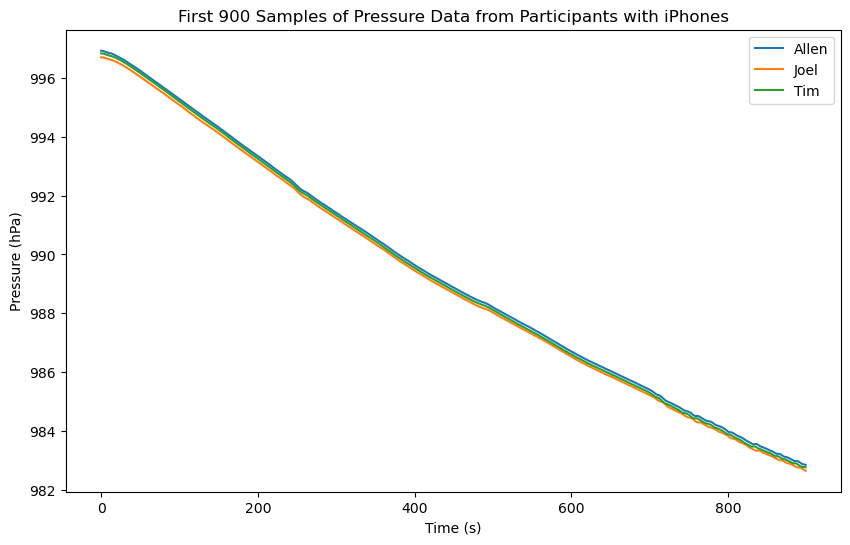

In [8]:
allenCleaned = allenCleaned
joelCleaned = joelCleaned
timCleaned = timCleaned


plt.figure(figsize=(10, 6))
plt.plot(allenCleaned, label="Allen")
plt.plot(joelCleaned, label="Joel")
plt.plot(timCleaned, label="Tim")
plt.xlabel("Time (s)")
plt.ylabel("Pressure (hPa)")
plt.legend()
plt.title("First 900 Samples of Pressure Data from Participants with iPhones")
plt.show()

In [21]:
# Physical Constants

# Total jar capacity in cubic meters (4200 mL = 0.0042 m^3)
V_jar = 0.0042 

# Estimate volume occupied by phones by uisng the dimensions or an iPhone 16 Pro Max without a case
phoneHeight = 163/1000 # Average height of a phone with case in meters
phoneWidth = 77.6/1000 # Average width of a phone with case in meters
phoneDepth = 8.25/1000 # Average depth of a phone with case in meters
V_phones = 6 * (phoneHeight * phoneWidth * phoneDepth) # Volume of 6 phones with cases in cubic meters
print (f"Estimated volume occupied by 6 phones: {V_phones:.6f} m^3")

# The actual volume occupied by the gas (V in PV=nRT)
V_gas = V_jar - V_phones # Result: 0.003369 m^3
print(f"Estimated volume occupied by the gas: {V_gas:.6f} m^3")

# Ideal Gas Constant in SI units (J / (mol * K))
R = 8.314 

Estimated volume occupied by 6 phones: 0.000626 m^3
Estimated volume occupied by the gas: 0.003574 m^3


In [10]:
# Data Analysis

allenMean = np.mean(allenCleaned)
joelMean = np.mean(joelCleaned)
timMean = np.mean(timCleaned)

iPhoneMeans = [allenMean, joelMean, timMean]
iPhoneMean = np.mean(iPhoneMeans)

# Sample standard deviation
allenStdDev = np.std(allenCleaned, ddof=1) 
joelStdDev = np.std(joelCleaned, ddof=1) 
timStdDev = np.std(timCleaned, ddof=1) 

iPhonePropogation = np.sqrt((allenStdDev**2 + joelStdDev**2 + timStdDev**2)) 
print(f"Propogation for the iPhones is {round(iPhonePropogation, 2)} Pa")

Propogation for the iPhones is 7.21 Pa


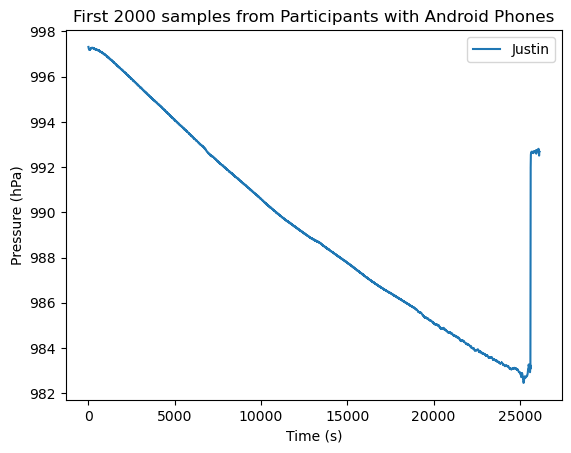

In [11]:
# Clean up Justin's Android data by finding the start of the sample period
sampleStartIndex = 2000 # Index to start looking for the sample period, ignoring the first 100 samples
justinStartIndex = np.argmax(justinRaw[sampleStartIndex:]) + sampleStartIndex
justinCleaned = justinRaw[justinStartIndex:]


plt.plot(justinCleaned, label="Justin")
plt.xlabel("Time (s)")
plt.ylabel("Pressure (hPa)")
plt.legend()
plt.title(f"First {sampleStartIndex} samples from Participants with Android Phones")
plt.show()

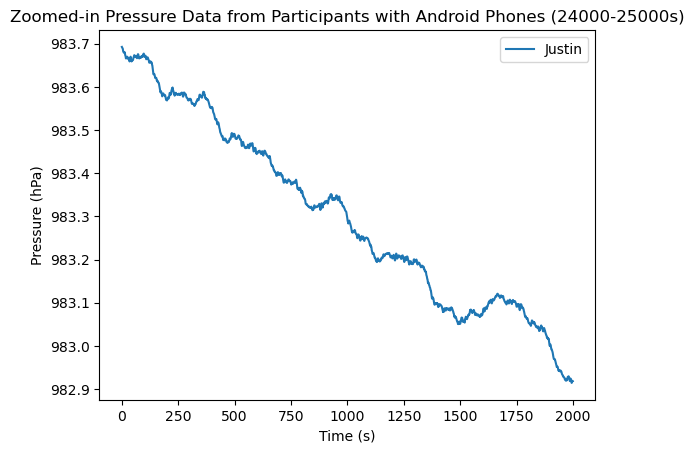

In [12]:
# zoom into 24000 - 25000 to find end of sample period
plt.plot(justinCleaned[23000:25000], label="Justin")
plt.xlabel("Time (s)")
plt.ylabel("Pressure (hPa)")
plt.legend()
plt.title("Zoomed-in Pressure Data from Participants with Android Phones (24000-25000s)")
plt.show()

Justin's smaple size ends at t = 24500

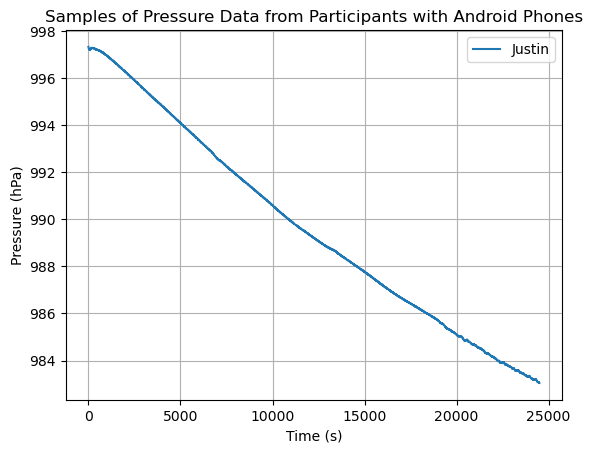

In [13]:
justinCleaned = justinCleaned[:24500] # Keep only the samples from 2000 to 24500, which is the sample period for Justin's data
plt.plot(justinCleaned, label="Justin")
plt.xlabel("Time (s)")
plt.ylabel("Pressure (hPa)")
plt.legend()  
plt.grid()  
plt.title("Samples of Pressure Data from Participants with Android Phones")
plt.show()

Length of Justin's samples are 900


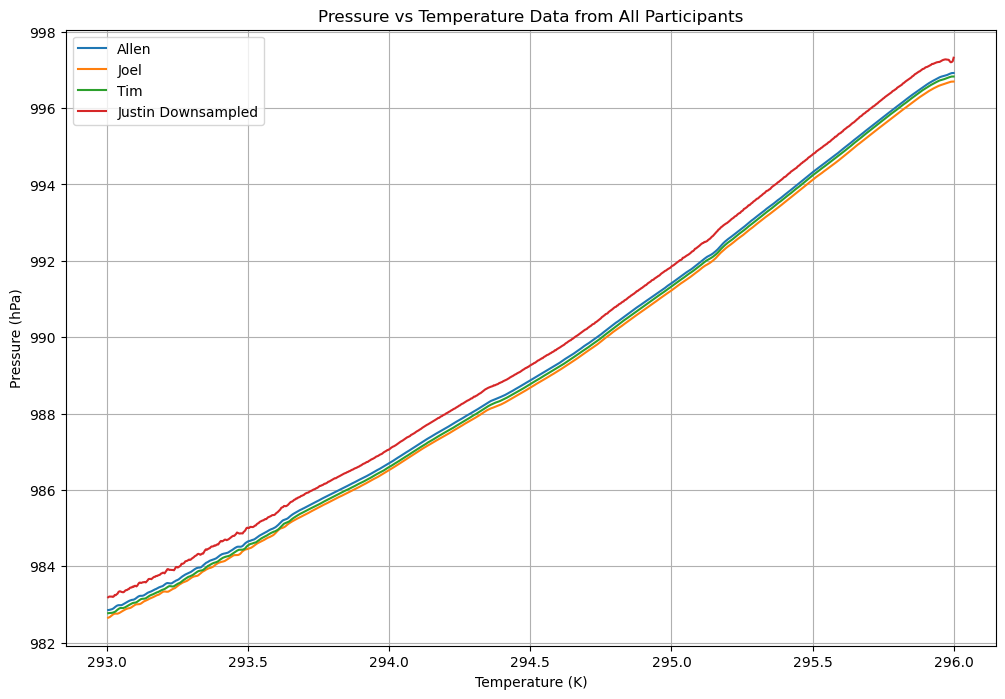

In [14]:
# Graph all the data by taking 900 samples for Justin's data to match the iPhones' sample size
samplePeriod = int(len(justinCleaned)/len(allenCleaned)) # Check the length of Justin's cleaned data to ensure it has at least 900 samples

justinDownsampled = justinCleaned[::samplePeriod]
justinDownsampled = justinDownsampled[:900] # Keep only the first 900 samples to match the iPhones' sample size
print(f"Length of Justin's samples are {len(justinDownsampled)}") # Check the length of the downsampled data to ensure it has 900 samples
plt.figure(figsize=(12, 8))

timeArray = np.arange(T0, TF, (TF - T0) / len(allenCleaned)) # Create a time array for the x-axis based on the number of samples and the temperature change

plt.plot(timeArray, allenCleaned, label="Allen")
plt.plot(timeArray, joelCleaned, label="Joel")
plt.plot(timeArray, timCleaned, label="Tim")
plt.plot(timeArray[:len(justinDownsampled)], justinDownsampled, label="Justin Downsampled")
plt.xlabel("Temperature (K)")
plt.ylabel("Pressure (hPa)")
plt.legend()
plt.grid()
plt.title("Pressure vs Temperature Data from All Participants")
plt.show()

With N = 900 samples, we can get the slope by using the first and last 10 samples

#### Slope

In [15]:
# 1. Get the INITIAL pressure (average of the first 10 samples for everyone)
P_initial_list = [
    np.mean(allenCleaned[:10]),
    np.mean(joelCleaned[:10]),
    np.mean(timCleaned[:10]),
    np.mean(justinDownsampled[:10])
]
P_initial = np.mean(P_initial_list)

# 2. Get the FINAL pressure (average of the last 10 samples for everyone)
P_final_list = [
    np.mean(allenCleaned[-10:]),
    np.mean(joelCleaned[-10:]),
    np.mean(timCleaned[-10:]),
    np.mean(justinDownsampled[-10:])
]
P_final = np.mean(P_final_list)

print(f"Group P_initial: {round(P_initial, 2)} hPa")
print(f"Group P_final: {round(P_final, 2)} hPa")

Group P_initial: 996.9 hPa
Group P_final: 982.91 hPa


In [16]:
# Slope
slope = (P_final - P_initial)/(TF - T0)
print(slope)

4.665391284166655


Error for P_initial: 0.06 hPa
Error for P_final: 0.07 hPa


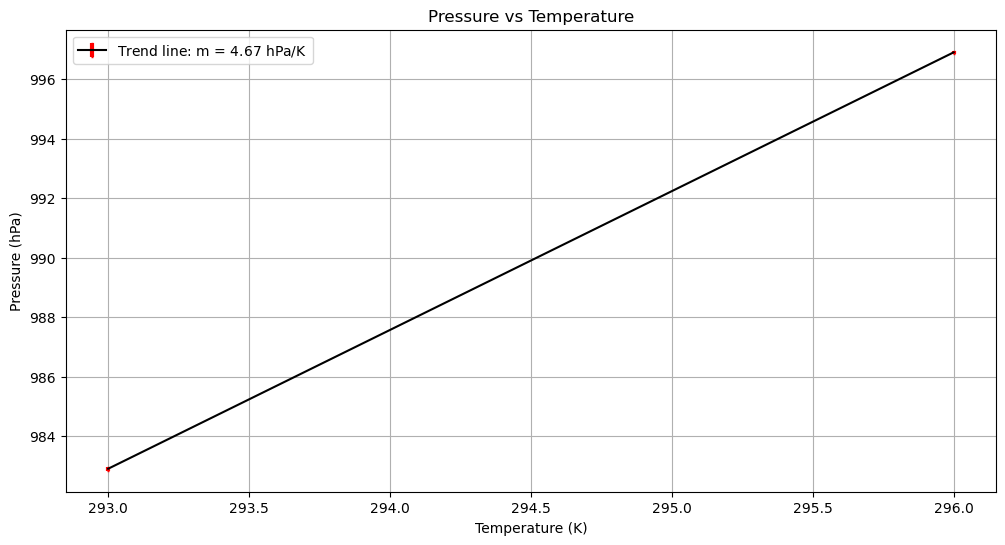

In [26]:
T = [TF, T0]
P = [P_final, P_initial]

firstStdDevs = [
    np.std(allenCleaned[:10], ddof=1),
    np.std(joelCleaned[:10], ddof=1),
    np.std(timCleaned[:10], ddof=1),
    np.std(justinDownsampled[:10], ddof=1)
]

lastStdDevs = [
    np.std(allenCleaned[-10:], ddof=1),
    np.std(joelCleaned[-10:], ddof=1),
    np.std(timCleaned[-10:], ddof=1),
    np.std(justinDownsampled[-10:], ddof=1)
]

firstPropogation = np.sqrt(firstStdDevs[0]**2 + firstStdDevs[1]**2 + firstStdDevs[2]**2 + firstStdDevs[3]**2)
lastPropogation = np.sqrt(lastStdDevs[0]**2 + lastStdDevs[1]**2 + lastStdDevs[2]**2 + lastStdDevs[3]**2)

yErrors = [lastPropogation, firstPropogation]
print(f"Error for P_initial: {round(firstPropogation, 2)} hPa")
print(f"Error for P_final: {round(lastPropogation, 2)} hPa")

plt.figure(figsize=(12, 6))

plt.errorbar(T, P, 
             yerr=yErrors,
             color='black',          # Professional high-contrast color
             ecolor='red',           # Different color for error bars to make them pop
             elinewidth=3,           # Makes the vertical lines thicker
             capsize=1,             # Makes the horizontal 'I' caps wider
             markersize=8,           # Makes the data points larger 
             label=f"Trend line: m = ${round(slope, 2)}$ hPa/K")

plt.xlabel("Temperature (K)")
plt.ylabel("Pressure (hPa)")
plt.title("Pressure vs Temperature")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# --- ANALYSIS CALCULATION ---

# According to the board notes: n = (m * V) / R
slope_pa = slope * 100 # Convert slope from hPa/K to Pa/K


n_moles_jar_volume = (slope_pa * V_jar) / R
n_moles_phone_volume = (slope_pa * V_gas) / R

n_moles_theoretical_inital = (P_initial*100 * V_gas) / (R * T0)
n_moles_theoretical_final = (P_final*100 * V_gas) / (R * TF)

print(f"Estimated number of moles of gas in the jar without phones: {round(n_moles_jar_volume, 4)} moles, where the slope is {round(slope, 2)} hPa/K, V_jar is {V_jar:.4f} m^3, and R is {R} J/(mol*K)")
print(f"Estimated number of moles of gas in the jar with phones: {round(n_moles_phone_volume, 4)} moles, where the slope is {round(slope, 2)} hPa/K, V_phones is {V_phones:.4f} m^3, and R is {R} J/(mol*K)")
print(f"Theoretical number of moles of gas in the jar at initial conditions: {round(n_moles_theoretical_inital, 4)} moles, where P_initial is {round(P_initial, 2)} hPa, V_gas is {V_gas:.4f} m^3, R is {R} J/(mol*K), and T0 is {T0} K)")
print(f"Theoretical number of moles of gas in the jar at final conditions: {round(n_moles_theoretical_final, 4)} moles, where P_final is {round(P_final, 2)} hPa, V_gas is {V_gas:.4f} m^3, R is {R} J/(mol*K), and TF is {TF} K)")

Pressure at 0 K based on linear fit: -38405.27 Pa
Estimated number of moles of gas in the jar without phones: 0.2357 moles, where the slope is 4.67 hPa/K, V_jar is 0.0042 m^3, and R is 8.314 J/(mol*K)
Estimated number of moles of gas in the jar with phones: 0.2005 moles, where the slope is 4.67 hPa/K, V_phones is 0.0006 m^3, and R is 8.314 J/(mol*K)
Theoretical number of moles of gas in the jar at initial conditions: 0.1448 moles, where P_initial is 996.9 hPa, V_gas is 0.0036 m^3, R is 8.314 J/(mol*K), and T0 is 296 K)
Theoretical number of moles of gas in the jar at final conditions: 0.1442 moles, where P_final is 982.91 hPa, V_gas is 0.0036 m^3, R is 8.314 J/(mol*K), and TF is 293 K)


In [19]:
percent_error = abs(n_moles_phone_volume - (n_moles_theoretical_final + n_moles_theoretical_inital)/2) / n_moles_theoretical_final * 100
print("Mean of theoretical moles at initial and final conditions: ", round((n_moles_theoretical_final + n_moles_theoretical_inital)/2, 4))
print(f"Percent error between the estimated number of moles using the slope and the theoretical number of moles at final conditions: {round(percent_error, 2)}%")

Mean of theoretical moles at initial and final conditions:  0.1445
Percent error between the estimated number of moles using the slope and the theoretical number of moles at final conditions: 38.88%
